<a href="https://colab.research.google.com/github/JoanYego/Soccer-Match-Prediction-Model/blob/master/Football_Match_Results_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Research Question

## a) Specifying the Question

> The goal of this analysis is to come up with a model that can predict the results of a football game between two teams. Some of the considerations that will form the basis of the prediction model include the team that is home, the team that is playing away and the nature of game/tournament.

## b) Defining the Metric for Success

> This project will be considered a success when are able to develop a reliable prediction model that has a high accuracy level. The model should also not suffer from any instances of overfitting or underfitting.

## c) Understanding the Context

> Football is currently the most popular sport in the world. This is according to various sports ranking criteria such as global fan base and audience, viewership on t.v., popularity on the internet, sponsorship deals among other financial and social factors. Among football fans and even professional football analysts, predicting the outcome of a match is quite common.

> There are several factors that affect the outcome of a football game. Some teams generally perform better than others as classified in the FIFA rankings. These rankings rate national teams based on their performance on FIFA-recognized international matches.The ranking method has changed overtime since it's inception in 1993.

> In general, it would be presumed that a high ranking team would be better suited to win a game against a lower ranking opponent. However, there are other factors that could come into play. Some of these factors include, which team is playing at home versus away and whether or not the match is friendly. Using some of these factors, this analysis aims to take advantage of machine learning algorithms and develop a model that can predict the outcome of a football match. More specifically, I will be using a polynomial and logistic regression approaches to come up with a suitable model.

## d) Recording the Experimental Design

> Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

>* Load data and preview preliminary characteristics 
>* Data Cleaning (check for and deal with outliers, anomalies and missing data)
>* Exploratory Analysis
>* Implementing the Solution
>* Challenging the Solution 
>* Follow Up Questions

## e) Data Relevance

> There are two datasets available for this project. The first dataset contains records of various football matches since 1872 to 2019. Other attributes available in this dataset include the home team, away team, goals scored by home team, goals by away team, location of match and the tournament type.

> The second dataset contains the annual FIFA ranking records since 1993 through 2018. Some of the attributes included in the second dataset include country name and code, country rank, date of ranking, previous and total points among other variables.

> Both datasets contain relevant information that can allow us to respond to the research question. The available features and records are also sufficient and up to date enough to allow us build a reliable prediction model.

# Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the Data

In [16]:
# reading the two datasets

fifa_ranking = pd.read_csv('fifa_ranking.csv')
match_results = pd.read_csv('results.csv')


# Checking the Data

> a) Fifa Rankings Dataset

In [3]:
# previewing a random sample of the data

fifa_ranking.sample(n=4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
33470,129,Singapore,SIN,0.0,232,-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,9/3/2008
30456,17,Ukraine,UKR,0.0,1044,-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,7/18/2007
13328,47,Côte d'Ivoire,CIV,0.0,536,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,5/10/2000
17828,84,El Salvador,SLV,0.0,482,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,3/20/2002


In [4]:
# previewing the top 5 records

fifa_ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,8/8/1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,8/8/1993


In [5]:
# previewing the bottom 5 records 

fifa_ranking.tail(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,6/7/2018
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,6/7/2018
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,6/7/2018
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,6/7/2018
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,6/7/2018


In [6]:
# checking the number of rows and columns

fifa_ranking.shape

(57793, 16)

In [7]:
# checking datatypes of each attribute and previewing the existense of null values

fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

>* The are no nulls in this dataframe. The rank_date column needs to be changed into a datetime type.

> b) Match Results Dataset

In [8]:
# previewing a random sample of the second dataset

match_results.sample(n=4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
10170,6/30/1977,Brazil,France,2,2,Friendly,Rio de Janeiro,Brazil,False
29357,7/5/2007,Åland Islands,Frøya,3,1,Island Games,Rhodos,Greece,True
8584,5/23/1973,Thailand,Malaysia,0,2,FIFA World Cup qualification,Seoul,South Korea,True
9871,10/16/1976,Portugal,Poland,0,2,FIFA World Cup qualification,Porto,Portugal,False


In [9]:
# previewing the top 5 records in the data

match_results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [10]:
# previewing the bottom 5 records

match_results.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,7/18/2019,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,7/18/2019,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,7/19/2019,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,7/19/2019,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,7/20/2019,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [11]:
# checking the number of records and attributes 

match_results.shape

(40839, 9)

In [12]:
# checking datatypes of each attribute and previewing the existense of null values

match_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


>* This second dataframe also has no missing values. Date column needs to be updated to appropriate data type.
>* The neutral column should also be an object type and not a bool.

# Data Cleaning

> We will perform some preliminary data cleaning on the two dataframes then merge the two datasets using an inner join so that we have all results of past matches as well as the national team rankings in one dataframe. We can then perform additional data cleaning procedures on the merged dataset.

In [18]:
# First, convert boolean type to string

booleandf = match_results.select_dtypes(include=[bool])
booleanDictionary = {True: 'TRUE', False: 'FALSE'}

for column in booleandf:
    match_results['neutral'] = match_results['neutral'].map(booleanDictionary)

>* We need to have records of matches where the teams are actually true home away teams by dropping the records where teams are playing in neutral grounds

In [20]:
# Drop records where neutral is true

match_results = match_results.drop(match_results[match_results.neutral == 'TRUE'].index)

match_results.neutral.value_counts()

FALSE    30680
Name: neutral, dtype: int64

In [21]:
# Need to convert date column from object to date type

fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])
match_results['date'] = pd.to_datetime(match_results['date'])


In [22]:
# Combined month and year column

fifa_ranking['month_year'] = pd.to_datetime(fifa_ranking['rank_date']).dt.to_period('M')
match_results['month_year'] = pd.to_datetime(match_results['date']).dt.to_period('M')

In [23]:
# Dropping unneccessary columns from the fifa ranking dataset

fifa_ranking = fifa_ranking.drop(columns=['country_abrv', 'total_points', 'previous_points','rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'])

In [24]:
# We can now use an inner join to merge the two datasets

# First we merge on the home team to get the home team ranks

home_team = pd.merge(match_results, fifa_ranking, left_on= ['home_team', 'month_year'], 
                     right_on= ['country_full', 'month_year'], how = 'inner')

# renaming the rank colum to home_team_rank

home_team.rename(columns={'rank' : 'home_team_rank'}, inplace=True)
home_team

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month_year,home_team_rank,country_full,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,1993-08,70,Peru,CONMEBOL,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,1993-08,70,Peru,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14043,2018-06-12,Poland,Lithuania,4,0,Friendly,Warsaw,Poland,FALSE,2018-06,8,Poland,UEFA,2018-06-07
14044,2018-06-09,Denmark,Mexico,2,0,Friendly,Brøndby,Denmark,FALSE,2018-06,12,Denmark,UEFA,2018-06-07
14045,2018-06-09,Hungary,Australia,1,2,Friendly,Budapest,Hungary,FALSE,2018-06,51,Hungary,UEFA,2018-06-07
14046,2018-06-09,Estonia,Morocco,1,3,Friendly,Tallinn,Estonia,FALSE,2018-06,94,Estonia,UEFA,2018-06-07


In [25]:
# Next, we merge on the away team to get their ranks

away_team = pd.merge(match_results, fifa_ranking, left_on=['away_team', 'month_year'],
                     right_on= ['country_full', 'month_year'], how = 'inner')

away_team.rename(columns={'rank' : 'away_team_rank'}, inplace=True)
away_team

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month_year,away_team_rank,country_full,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,67,Paraguay,CONMEBOL,1993-08-08
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,FALSE,1993-08,67,Paraguay,CONMEBOL,1993-08-08
2,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,1993-08,5,Argentina,CONMEBOL,1993-08-08
3,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,FALSE,1993-08,5,Argentina,CONMEBOL,1993-08-08
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,5,Argentina,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,2018-06-09,Estonia,Morocco,1,3,Friendly,Tallinn,Estonia,FALSE,2018-06,41,Morocco,CAF,2018-06-07
14036,2018-06-09,Finland,Belarus,2,0,Friendly,Tampere,Finland,FALSE,2018-06,78,Belarus,UEFA,2018-06-07
14037,2018-06-10,Austria,Brazil,0,3,Friendly,Vienna,Austria,FALSE,2018-06,2,Brazil,CONMEBOL,2018-06-07
14038,2018-06-12,Poland,Lithuania,4,0,Friendly,Warsaw,Poland,FALSE,2018-06,126,Lithuania,UEFA,2018-06-07


>* The away_team and home_team dataframe have similar columns so we can get only the unique column from the away_team to merge with full home_team dataframe in order to produce the final dataframe

In [26]:
# extract unique colums for away_team

final_away_team = away_team[['date','home_team', 'away_team', 'away_team_rank']]
final_away_team

,date,home_team,away_team,away_team_rank
0,1993-08-01,Colombia,Paraguay,67
1,1993-08-29,Argentina,Paraguay,67
2,1993-08-01,Peru,Argentina,5
3,1993-08-08,Paraguay,Argentina,5
4,1993-08-15,Colombia,Argentina,5
...,...,...,...,...
14035,2018-06-09,Estonia,Morocco,41
14036,2018-06-09,Finland,Belarus,78
14037,2018-06-10,Austria,Brazil,2
14038,2018-06-12,Poland,Lithuania,126


In [27]:
# Merge home team dataframe and final away team dataframe

final = pd.merge(home_team, final_away_team, left_on = ['home_team', 'away_team', 'date'],
                 right_on = ['home_team', 'away_team', 'date'], how = 'inner')

final

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month_year,home_team_rank,country_full,confederation,rank_date,away_team_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08,67
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08,5
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,FALSE,1993-08,19,Colombia,CONMEBOL,1993-08-08,70
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,1993-08,70,Peru,CONMEBOL,1993-08-08,5
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,FALSE,1993-08,70,Peru,CONMEBOL,1993-08-08,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12945,2018-06-12,Poland,Lithuania,4,0,Friendly,Warsaw,Poland,FALSE,2018-06,8,Poland,UEFA,2018-06-07,126
12946,2018-06-09,Denmark,Mexico,2,0,Friendly,Brøndby,Denmark,FALSE,2018-06,12,Denmark,UEFA,2018-06-07,15
12947,2018-06-09,Hungary,Australia,1,2,Friendly,Budapest,Hungary,FALSE,2018-06,51,Hungary,UEFA,2018-06-07,36
12948,2018-06-09,Estonia,Morocco,1,3,Friendly,Tallinn,Estonia,FALSE,2018-06,94,Estonia,UEFA,2018-06-07,41


In [28]:
# Drop unnecessary columns in the final dataframe

final = final.drop(columns=['country_full', 'confederation', 'rank_date', 'month_year', 'city',
                            'country'])
final

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,away_team_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,FALSE,19,67
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,FALSE,19,5
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,FALSE,19,70
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,FALSE,70,5
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,FALSE,70,19
...,...,...,...,...,...,...,...,...,...
12945,2018-06-12,Poland,Lithuania,4,0,Friendly,FALSE,8,126
12946,2018-06-09,Denmark,Mexico,2,0,Friendly,FALSE,12,15
12947,2018-06-09,Hungary,Australia,1,2,Friendly,FALSE,51,36
12948,2018-06-09,Estonia,Morocco,1,3,Friendly,FALSE,94,41


In [29]:
# Checking for duplicate records

final.duplicated().any()

True

In [30]:
# Drop duplicates 

final.drop_duplicates(keep = 'first', inplace=True)

In [31]:
# Verify there are no more duplicates

final.duplicated().any()

False

In [32]:
# Number of records after dropping duplicates

final.shape

(12916, 9)

> Outliers

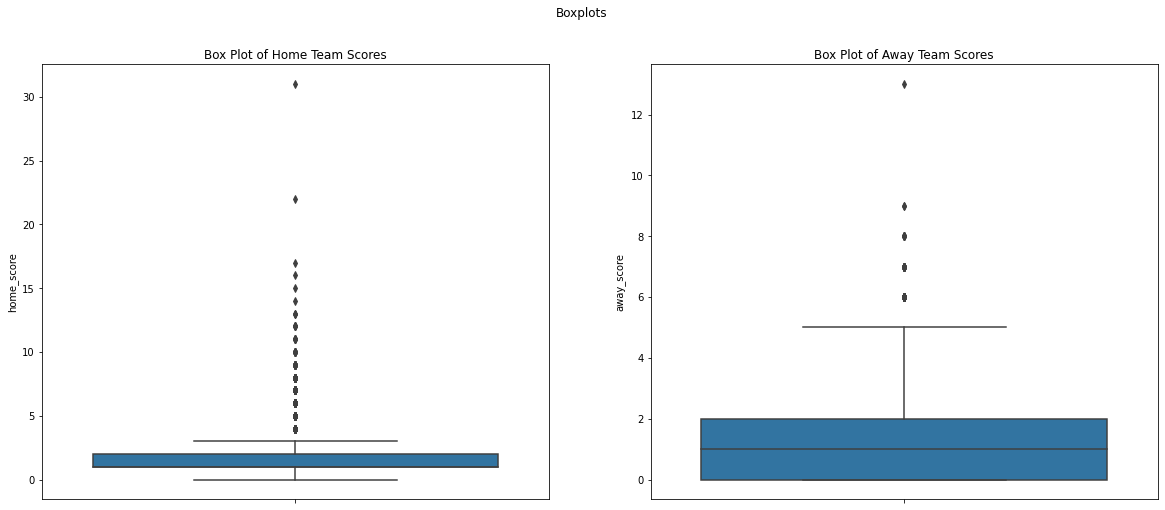

In [33]:
# Checking for outliers using boxplots

fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=final, y = "home_score", ax=ax[0])
ax[0].set_title('Box Plot of Home Team Scores')
sns.boxplot(data=final, y = "away_score", ax=ax[1])
ax[1].set_title('Box Plot of Away Team Scores')

plt.show()

>* Since the above outliers could be valid observations, we will not remove them.

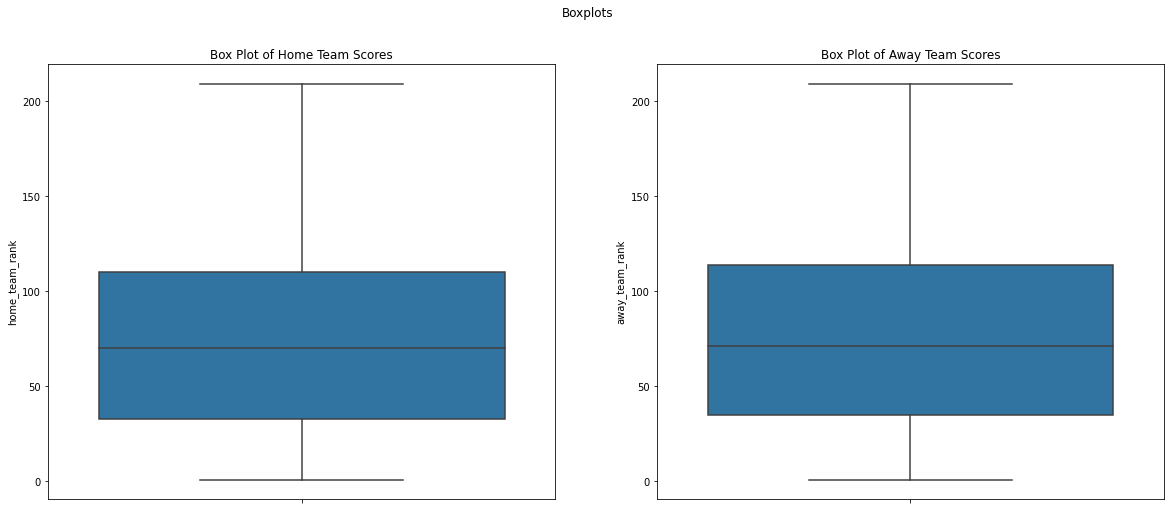

In [39]:
# boxplot for rank attribute

fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=final, y = "home_team_rank", ax=ax[0])
ax[0].set_title('Box Plot of Home Team Scores')
sns.boxplot(data=final, y = "away_team_rank", ax=ax[1])
ax[1].set_title('Box Plot of Away Team Scores')

plt.show()

In [40]:
# Checking for missing values

final.isnull().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
neutral           0
home_team_rank    0
away_team_rank    0
dtype: int64

In [41]:
# extracting year column from the final dataframe

final['year'] = final['date'].dt.year


# Exploratory Data Analysis

## Univariate Analysis

In [43]:
# frequency table for home teams

final.home_team.value_counts()

Japan                       164
Oman                        159
Saudi Arabia                158
Qatar                       157
France                      155
                           ... 
Afghanistan                   2
Montserrat                    2
Turks and Caicos Islands      1
Gibraltar                     1
Kosovo                        1
Name: home_team, Length: 191, dtype: int64

In [44]:
# frequency table for away_team

final.away_team.value_counts()

Finland                     146
Zambia                      140
Estonia                     138
Sweden                      129
Norway                      125
                           ... 
Samoa                         7
Gibraltar                     6
Turks and Caicos Islands      5
Kosovo                        4
Montserrat                    3
Name: away_team, Length: 193, dtype: int64

In [45]:
# frequency table for tournament type

final.tournament.value_counts()

Friendly                                5263
FIFA World Cup qualification            3760
UEFA Euro qualification                 1366
African Cup of Nations qualification     858
AFC Asian Cup qualification              312
                                        ... 
Nations Cup                                3
Lunar New Year Cup                         2
OSN Cup                                    2
Millennium Cup                             1
Copa América qualification                 1
Name: tournament, Length: 61, dtype: int64

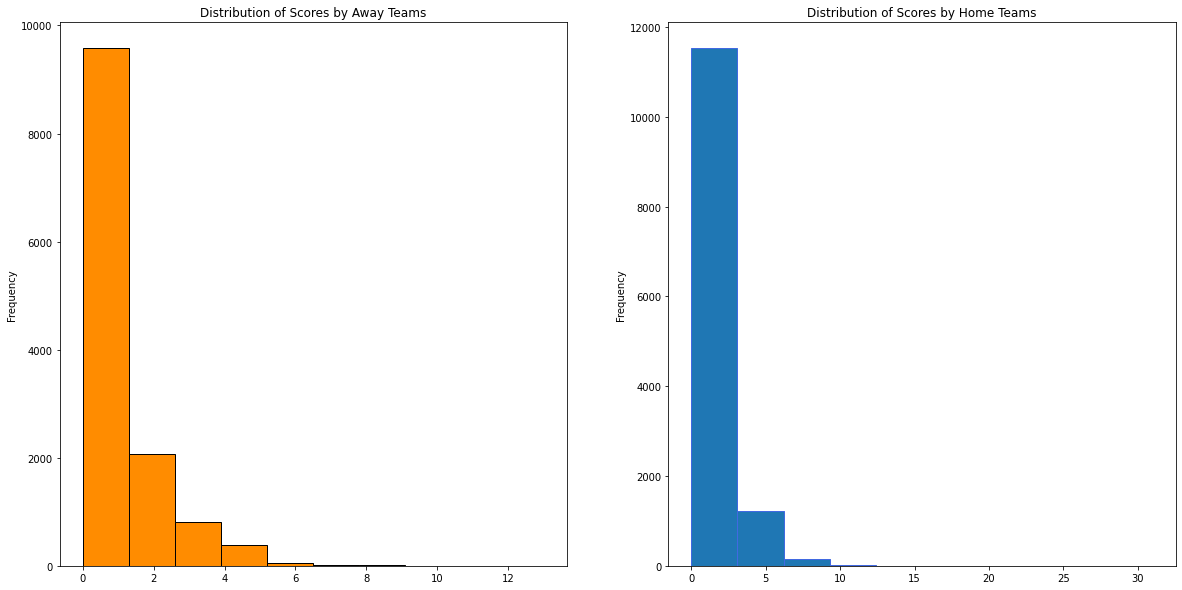

In [47]:
# histograms to show distribution of goals scores

fig, ax=plt.subplots(1,2, figsize=(20,10))
final['away_score'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('Distribution of Scores by Away Teams')

final['home_score'].plot.hist(ax=ax[1], bins=10, edgecolor='royalblue')
ax[1].set_title('Distribution of Scores by Home Teams')


plt.show()

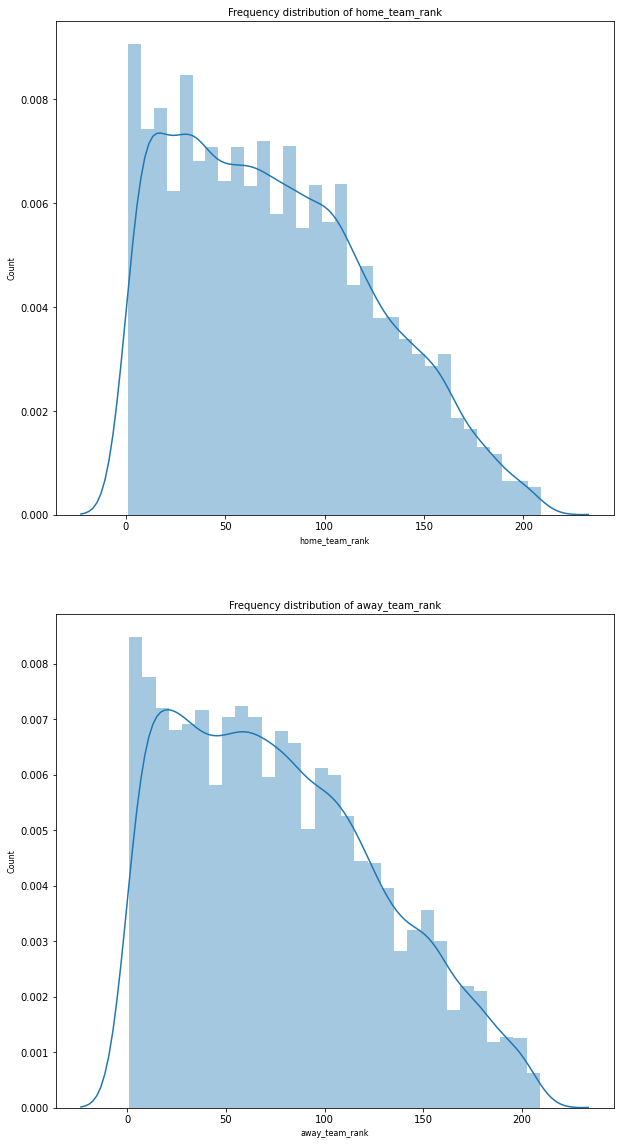

In [48]:
# Frequency distribution plots

col_names = ['home_team_rank','away_team_rank']
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(final[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

> Measures of Central Tendency


In [55]:
# mean, mode and median of home scores

print('Mean score by home team is ' + str(round(final.home_score.mean(),0)))
print('Median score by home team is ' + str(final.home_score.median()))
print('Mode score by home team is ' + str(final.home_score.mode()))

Mean score by home team is 2.0
Median score by home team is 1.0
Mode score by home team is 0    1
dtype: int64


In [54]:
# mean, mode and median of away scores

print('Mean score by away team is ' + str(round(final.away_score.mean(),0)))
print('Median score by away team is ' + str(final.away_score.median()))
print('Mode score by away team is ' + str(final.away_score.mode()))

Mean score by away team is 1.0
Median score by away team is 1.0
Mode score by away team is 0    0
dtype: int64


>* The most occuring score for home teams is 1 while the most occuring score for away teams is 0. In addition, the average score for home teams is 2 while the average score for away teams is 1. These two observations 'loosely' point towards a likely advantage for teams playing at home.


> Measures of Dispersion

In [56]:
# summary of standard deviation, range, and interquatile range

final.describe()

,home_score,away_score,home_team_rank,away_team_rank,year
count,12916.000000,12916.000000,12916.000000,12916.000000,12916.000000
mean,1.641375,0.998761,75.007433,77.558145,2006.326339
std,1.616620,1.164050,49.486915,51.147970,6.761678
min,0.000000,0.000000,1.000000,1.000000,1993.000000
25%,1.000000,0.000000,33.000000,35.000000,2001.000000
50%,1.000000,1.000000,70.000000,71.000000,2007.000000
75%,2.000000,2.000000,110.000000,114.000000,2012.000000
max,31.000000,13.000000,209.000000,209.000000,2018.000000


## Bivariate Analysis

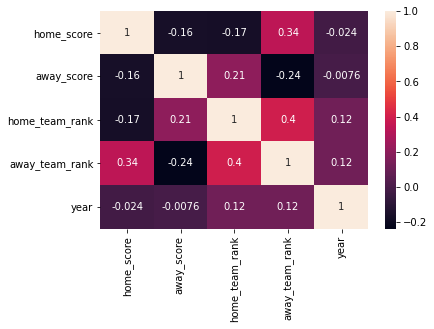

In [57]:
# Checking the pearson correlation coefficient 

sns.heatmap(final.corr(),annot=True)
plt.show()

>* The home team rank has a slight positive correlation with the away team rank. 

>* It is also the case that as the opponent team ranks poorly (in this case a larger rank number) the likelihood of a team scoring more goes up slightly. This is the case for both home and away teams.

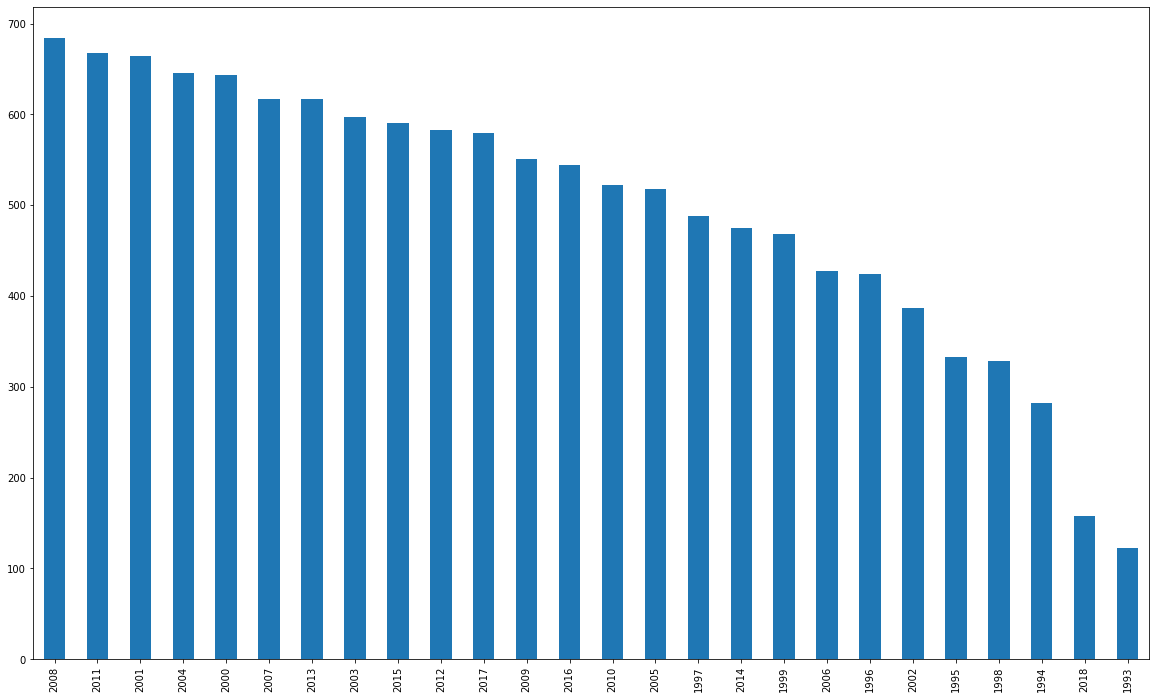

In [58]:
# Checking the total number of matches played by year

final['year'].value_counts().plot.bar(figsize=(20,12))

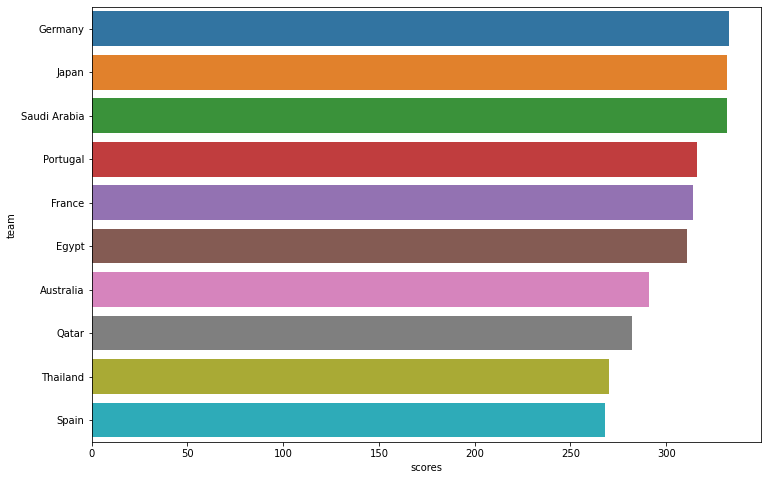

In [74]:
# Bar chart showing the top 10 highest ranking home teams by total scores

total_home_score = final.groupby('home_team')['home_score'].sum().reset_index()
total_home_score.columns = ['team', 'scores'] 
total_home_goals = total_home_score.sort_values('scores', ascending=False)

plt.figure(figsize=(12,8))
ax= sns.barplot("scores","team",data=total_home_goals[:10])

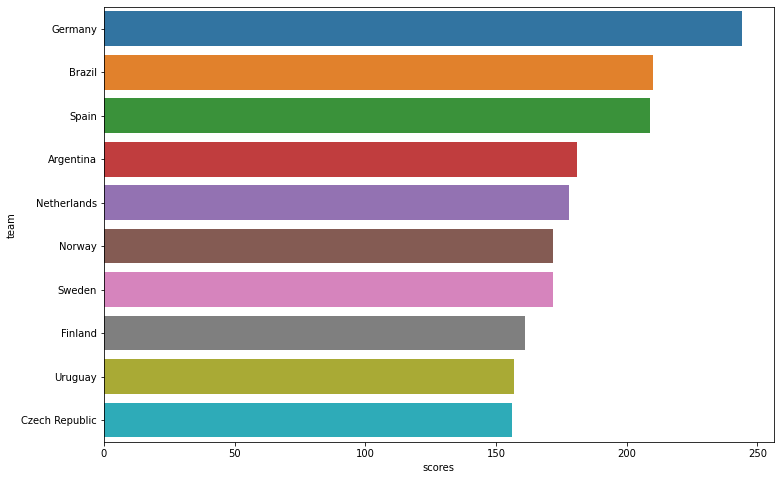

In [75]:
# Bar chart showing the top 10 highest ranking away teams by total scores

total_away_score = final.groupby('away_team')['away_score'].sum().reset_index()
total_away_score.columns = ['team', 'scores'] 
total_away_goals = total_away_score.sort_values('scores', ascending=False)

plt.figure(figsize=(12,8))
ax= sns.barplot("scores","team",data=total_away_goals[:10])

# Implementing the Solution

> Below are the steps I follow in this section of the analysis:

>* Perform any necessary feature engineering
>* Check for multicollinearity
>* Develop model
>* Cross-validate the model
>* Compute RMSE
>* Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

## Feature Engineering

> Before we begin regression analysis, we first need to create an additional column showing whether a match was a win, loss or draw from the home team's perspective.

In [76]:
# creating a list of our conditions

conditions = [final['home_score'] > final['away_score'],
              final['home_score'] < final['away_score'],
              final['home_score'] == final['away_score']]

# create a list of the values to assign each condition

values = ['Win', 'Loss', 'Draw']

# creating a new columnn status column using the conditions and values above

final['status'] = np.select(conditions, values)

final.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_team_rank,away_team_rank,year,status
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,FALSE,19,67,1993,Draw
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,FALSE,19,5,1993,Win
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,FALSE,19,70,1993,Win
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,FALSE,70,5,1993,Loss
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,FALSE,70,19,1993,Loss


## Approach 1: Polynomial Regression

In [77]:
# Dropping all columns that are no longer needed for the polynomial regression analysis

poly_final = final.drop(columns=['date', 'neutral', 'home_team','away_team', 'status', 'year'])

poly_final.head()

,home_score,away_score,tournament,home_team_rank,away_team_rank
0,0,0,FIFA World Cup qualification,19,67
1,2,1,FIFA World Cup qualification,19,5
2,4,0,FIFA World Cup qualification,19,70
3,0,1,FIFA World Cup qualification,70,5
4,0,1,FIFA World Cup qualification,70,19


In [78]:
# encoding the tournament column with numeric codes

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()
poly_final['tournament'] = le.fit_transform(poly_final['tournament'])

poly_final.head()

,home_score,away_score,tournament,home_team_rank,away_team_rank
0,0,0,25,19,67
1,2,1,25,19,5
2,4,0,25,19,70
3,0,1,25,70,5
4,0,1,25,70,19


> Checking for multicollinearity

In [79]:
# Remove the dependent columns so as to focus on independent variables only.

independent_only = poly_final.drop(columns=['home_score', 'away_score'])

# Display the correlations between the independent variables

correlations = independent_only.corr()

correlations

,tournament,home_team_rank,away_team_rank
tournament,1.000000,-0.180785,-0.190754
home_team_rank,-0.180785,1.000000,0.398187
away_team_rank,-0.190754,0.398187,1.000000


In [80]:
# Use calculated correlations to compute the VIF score for each variable

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,tournament,home_team_rank,away_team_rank
tournament,1.052019,0.131064,0.148489
home_team_rank,0.131064,1.204757,-0.454717
away_team_rank,0.148489,-0.454717,1.209387


>* From the result above, the VIF score for the tournament type is 1.05 and that for home team rank and away team rank are 1.20 and 1.21 respectively. (The VIF score is found along the diagonal from top left to bottom left). 

>* Since all the VIF scores are below 5, we can say that there is no multicollinearity thus no correlation between the independent variables.


### Model 1: Predict home team goals

In [91]:
# define the target variable and features
mycols = [col for col in poly_final.columns if col not in ['home_score', 'away_score']]

x = poly_final[mycols]
y = poly_final['home_score']

# splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, test_size = 0.3)

# scaling the train and test sets
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# fitting the polynomial regression to the dataset
poly_features = PolynomialFeatures(degree = 2,include_bias = False)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

# training the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# making predictions
y_pred = regressor.predict(x_test)

In [92]:
# checking a sample of the predictions 
df_pred = pd.DataFrame({'y_predicted': y_pred, 'y_test': y_test})
df_pred.sample(5)

,y_predicted,y_test
8374,0.912851,2
12862,3.029735,1
10195,1.783955,2
9284,2.809588,4
8586,0.653462,0


In [93]:
# assess the accuraccy of the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.0280736713667429
Mean Squared Error: 1.8727988557485344
Root Mean Squared Error: 1.368502413497519


>* The RMSE score is 1.36 which is quite high considering that the mean score by home teams is 2. We need to cross validate the model to identify potential biases.

> Cross Validation using LeaveOneOut K-fold Cross-Validation Method

In [95]:
# define the features and target
x = poly_final[["tournament", "home_team_rank", "away_team_rank"]].values
y = poly_final["home_score"].values

# define the k-fold cross validation method
folds = LeaveOneOut()

#assess cross validation model
RMSES = []
count = 0
for train_index, test_index in folds.split(x):
  # set up train and test based on split determined by k-fold
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting the polynomial regression model
  poly_regressor = PolynomialFeatures(degree = 1)    
  x_reg = poly_regressor.fit_transform(x_train)      

  #applying polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(x_reg, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_regressor.fit_transform(x_test))

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('Trained '+str(count) + ' models')
print('The Mean of the RMSES is: ' + str (np.mean(RMSES)))


Trained 12916 models
The Mean of the RMSES is: 1.0438161606444116


>* We get a slightly lower RMSE here which means that this is a better model to use given our current data set.

> Residuals and Heteroskedasticity testing

In [96]:
# Create the residuals

residuals = np.subtract(y_pred, y_test)

# Describe the residuals

pd.DataFrame(residuals).describe()


,0
count,1.000000
mean,-0.212566
std,NaN
min,-0.212566
25%,-0.212566
50%,-0.212566
75%,-0.212566
max,-0.212566


>* The results above show that the residuals are centered around the mean.

In [98]:
# Heteroskedasticity test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Computing a critical value of the chi squared distribution

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


nan
nan
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


### Model 2: Predict away team goals

In [99]:
# define the target variable and features
mycols = [col for col in poly_final.columns if col not in ['home_score', 'away_score']]

x = poly_final[mycols]
y = poly_final['away_score']


# splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, test_size = 0.3)


# scaling the train and test sets
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# fitting the polynomial regression to the dataset
poly_features = PolynomialFeatures(degree = 1,include_bias = False)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

# training the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# making predictions
y_pred = regressor.predict(x_test)

In [100]:
# checking a sample of the predictions 
df_pred = pd.DataFrame({'y_predicted': y_pred, 'y_test': y_test})
df_pred.sample(5)

,y_predicted,y_test
4332,1.361834,1
3469,0.458329,0
3660,0.598888,1
11931,0.942682,0
11394,1.156363,0


In [101]:
# assess the accuraccy of the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7985568191516141
Mean Squared Error: 1.0827411947997405
Root Mean Squared Error: 1.0405485067019895


>* The RMSE score is 1.04 which is high considering that the mean score by away teams is 1. This means we need to cross validate the model to identify potential biases.

> Cross Validation using LeaveOneOut Method

In [102]:
# define the features and target
x = poly_final[["tournament", "home_team_rank", "away_team_rank"]].values
y = poly_final["away_score"].values

# define the k-fold cross validation method
folds = LeaveOneOut()

#assess cross validation model
RMSES = []
count = 0
for train_index, test_index in folds.split(x):
  # set up train and test based on split determined by k-fold
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting the polynomial regression model
  poly_regressor = PolynomialFeatures(degree = 1)    
  x_reg = poly_regressor.fit_transform(x_train)      

  #applying polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(x_reg, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_regressor.fit_transform(x_test))

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('Trained '+str(count) + ' models')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))

Trained 12916 models
The mean of the RMSES is: 0.8061536906156043


> Residual plots and Heteroskedasticity testing

In [103]:
# Calculate the residuals

residuals2 = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,0
count,1.000000
mean,-0.212566
std,NaN
min,-0.212566
25%,-0.212566
50%,-0.212566
75%,-0.212566
max,-0.212566


>* The results above show that the residuals are centered around the mean.

In [104]:
# Heteroskedasticity test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(test_result)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

nan
nan
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


## Approach 2: Logistic Regression

In [105]:
# Creating dataframe to use for this regression analysis
log_final =final.drop(columns=['date', 'home_team', 'away_team', 'year', 'neutral'])
log_final

,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,0,0,FIFA World Cup qualification,19,67,Draw
1,2,1,FIFA World Cup qualification,19,5,Win
2,4,0,FIFA World Cup qualification,19,70,Win
3,0,1,FIFA World Cup qualification,70,5,Loss
4,0,1,FIFA World Cup qualification,70,19,Loss
...,...,...,...,...,...,...
12945,4,0,Friendly,8,126,Win
12946,2,0,Friendly,12,15,Win
12947,1,2,Friendly,51,36,Loss
12948,1,3,Friendly,94,41,Loss


In [106]:
# encoding the tournament column with numeric codes

le = LabelEncoder()
log_final['tournament'] = le.fit_transform(log_final['tournament'])

log_final.head()

,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,0,0,25,19,67,Draw
1,2,1,25,19,5,Win
2,4,0,25,19,70,Win
3,0,1,25,70,5,Loss
4,0,1,25,70,19,Loss


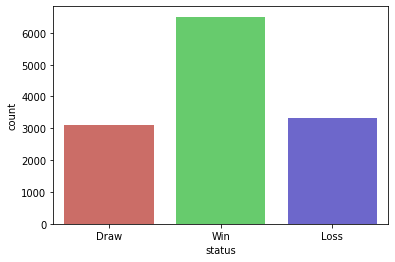

In [107]:
# Checking the distribution of the target variable

sns.countplot(x='status',data=log_final, palette='hls')

In [109]:
# encoding the status column with numeric codes

log_final['status'] = le.fit_transform(log_final['status'])

log_final.head()

,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,0,0,25,19,67,0
1,2,1,25,19,5,2
2,4,0,25,19,70,2
3,0,1,25,70,5,1
4,0,1,25,70,19,1


In [110]:
# Declaring the features and target
x = log_final.drop("status",axis=1)
y = log_final["status"]

# creating the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

# fitting the model
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)

# Using our model to make a prediction
y_predicted = LogReg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [111]:
# checking a sample of the predictions 
df_predicted = pd.DataFrame({'y_predicted': y_predicted, 'y_test': y_test})
df_predicted.sample(5)

,y_predicted,y_test
5242,0,0
5939,2,2
2215,0,0
2185,1,1
2953,2,2


In [112]:
# Evaluating the model

confusion_matrix = confusion_matrix(y_test, y_predicted)
print(confusion_matrix)

# Checking the model accuracy

accuracy = accuracy_score(y_test, y_predicted)
print('The accuracy of the model is', accuracy)


[[ 929    0    0]
 [   0 1000    0]
 [   0    0 1946]]
The accuracy of the model is 1.0


>* The results from the confusion matrix tell us that 929, 1000 and 1946 are the correct predictions. There are no incorrect predictions as confirmed by the accuracy model of 1.

>* This is a clear case of overfitting in the model. We can perform hyperparameter tuning to assess the model further.

> Hyperparameter tuning


In [114]:
# Method 1: Grid Search

# Declaring the features and target
x = log_final.drop("status",axis=1)
y = log_final["status"]

# Creating the logistic regression
logistic = linear_model.LogisticRegression()

# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=3, verbose=0)

# Fitting grid search
best_model = clf.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

In [115]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [116]:
# Define features, target and train and test sets

X = log_final.iloc[:, 0:5].values
y = log_final.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scaling our Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

# Training and Cross Validation
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

print(all_accuracies.mean())

0.9994838442944495


In [117]:
# dictionary of all parameters and the values we want to test for best performance

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [118]:
#Instantiating GridSearchCV object
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [119]:
#Calling the fit method
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [120]:
# Checking the parameters that return the highest accuracy

best_parameters = gd_sr.best_params_
print(best_parameters)


{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 800}


In [121]:
# Finding the obtained accuracy

best_result = gd_sr.best_score_
print(best_result)

0.9995870967466953


In [122]:
# Method 2: Random Search

# specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [123]:
# Instantiating RandomizedSearchCV object 

from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 

In [124]:
# Calling the fit method

random_sr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [125]:
# Checking the parameters that return the highest accuracy

best_parameters = random_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_split': 4}


In [128]:
# Finding the obtained accuracy

best_result = random_sr.best_score_
print(best_result)


0.9995870967466953


# Challenging the Solution

>* Although logistic regression has a higher accuracy level compared to polynomial regression, the former is more unstable and demonstrates a likelihood of overfitting.

>* Other models such as DecisionTreeClassifier should be explored to identify the ideal prediction model for this research question.



# Follow-up Questions

## a) Did we have the right data?

Yes, for the most part. The data was relevant to the research question and was also large enough.



## b) Do we need other data to answer our question?

There could be other factors that can impact the outcome of a football match. Some of these factors include weather, injuries (especially by star players) etc. These other features can be investigated and incorporated into the model for optimal prediction.

## c) Did we have a right question?

Yes, the research question was clear and specific.